<a href="https://colab.research.google.com/github/Aafreen2603/deep-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  %tensorflow_version 2.x 
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test)= fashion_mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
x_train=np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
K=len(set(y_train))
print("Number of Classes: ", K)

Number of Classes:  10


In [ ]:
i= Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2, activation = 'relu')(i)
x=Conv2D(64, (3,3), strides=2, activation ='relu')(x)
x=Conv2D(128, (3,3), strides=2, activation ='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512, activation ='softmax')(x)

model=Model(i,x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r= model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =15)

Epoch 1/15
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6053 - accuracy: 0.7880 - val_loss: 0.4347 - val_accuracy: 0.8429
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3881 - accuracy: 0.8571 - val_loss: 0.3620 - val_accuracy: 0.8693
Epoch 3/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3361 - accuracy: 0.8757 - val_loss: 0.3253 - val_accuracy: 0.8811
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3030 - accuracy: 0.8882 - val_loss: 0.3094 - val_accuracy: 0.8868
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2753 - accuracy: 0.8977 - val_loss: 0.3195 - val_accuracy: 0.8844
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2554 - accuracy: 0.9061 - val_loss: 0.3021 - val_accuracy: 0.8880
Epoch 7/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2366 - accuracy: 0.9120 - val_loss: 0.2997 -

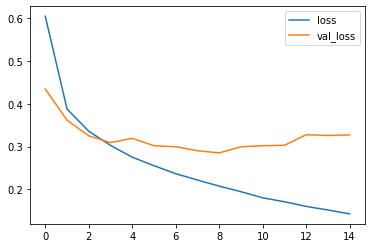

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

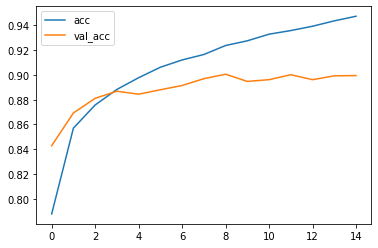

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
confusion matrix, without normalization
[[828   1  37  11   5   1 110   0   7   0]
 [  3 975   1  16   2   0   2   0   1   0]
 [  9   0 880   9  45   0  56   0   1   0]
 [  9   9  20 888  41   0  32   0   1   0]
 [  1   1  63  20 845   0  67   0   3   0]
 [  1   0   0   1   0 977   0  15   0   6]
 [ 94   0  75  19  86   0 719   0   7   0]
 [  0   0   0   0   0  16   0 959   0  25]
 [  4   1   4   3   5   5   3   2 971   2]
 [  0   0   0   0   0   9   1  37   1 952]]


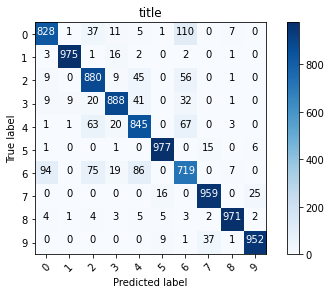

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  # function prints and plots confusion matrix.
  # normalization can be applied using 'normalize=True'
  if normalize:
    cm = cm.aspect('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('title')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels= '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

TypeError: ignored

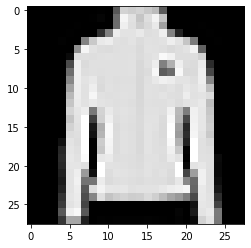

In [ ]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %s' %(labels[y_test[i]],labels[p_test[i]]));